# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sujit\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
apikey = os.getenv("NEWS_API")
type(apikey)

str

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
newsapi = NewsApiClient(apikey)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_articles = newsapi.get_everything(q='bitcoin',
                                      from_param='2021-07-16',
                                      to='2021-08-16',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_articles = newsapi.get_everything(q='ethereum',
                                      from_param='2021-07-16',
                                      to='2021-08-16',
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100)

In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]



In [8]:
print(f"max positive score for bitcoin: {bitcoin_df.positive.max()}")
print(f"max negative score for bitcoin: {bitcoin_df.negative.max()}")
print(f"max compound score for bitcoin: {bitcoin_df.compound.max()}")

max positive score for bitcoin: 0.274
max negative score for bitcoin: 0.271
max compound score for bitcoin: 0.8834


In [9]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!describe
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

print(f"max positive score for ethereum: {ethereum_df.positive.max()}")
print(f"max negative score for ethereum: {ethereum_df.negative.max()}")
print(f"max compound score for ethereum: {ethereum_df.compound.max()}")

max positive score for ethereum: 0.201
max negative score for ethereum: 0.177
max compound score for ethereum: 0.7506


In [10]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.081757,0.051900,0.031950,0.916160
std,0.348105,0.060312,0.049043,0.072374
min,-0.886000,0.000000,0.000000,0.724000
25%,-0.044250,0.000000,0.000000,0.866750
50%,0.000000,0.048500,0.000000,0.921000
75%,0.366350,0.082250,0.067500,1.000000
max,0.883400,0.274000,0.271000,1.000000


In [11]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.059292,0.047050,0.029420,0.923510
std,0.368538,0.059237,0.049393,0.069869
min,-0.757900,0.000000,0.000000,0.737000
25%,-0.159300,0.000000,0.000000,0.882000
50%,0.000000,0.000000,0.000000,0.926500
75%,0.345300,0.075500,0.061750,1.000000
max,0.750600,0.201000,0.177000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score

Bitcoin had the highest negative score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
sw_list = set(stopwords.words('english'))  

In [14]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
#sw1 = sw_list + extra_list

In [15]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
     # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_addons = {'Chars','another','said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically','reuters','reutersdado','also', 'illustration', 'ha', 'seem', 'reported','taken'}
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    
    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
   
    # Lemmatize words into root words

    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
    
    return tokens

In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['tokens'] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
1,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
2,2021-08-10,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[photo, joe, raedlegetty, images, twitter, squ..."
3,2021-08-12,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[joe, tidycyber, reporter, follow, money, gene..."
4,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."


In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['tokens'] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
3,2021-08-10,"After the bell today, Coinbase reported anothe...",0.5719,0.139,0.000,0.861,"[bell, coinbase, period, impressive, result, s..."
4,2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_string = bitcoin_df.text.str.cat()
bitcoin_token = tokenizer(bitcoin_string)
bitcoin_bigram = Counter(ngrams(tokenizer(bitcoin_string), n = 2))
bitcoin_bigram.most_common(10)

[(('ceo', 'jack'), 6),
 (('jack', 'dorsey'), 6),
 (('bitcoin', 'seen'), 6),
 (('story', 'originally'), 6),
 (('originally', 'appeared'), 6),
 (('charsaugust', 'min'), 6),
 (('article', 'wa'), 6),
 (('wa', 'translated'), 6),
 (('translated', 'spanish'), 6),
 (('spanish', 'edition'), 6)]

In [20]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_string = ethereum_df.text.str.cat()
ethereum_token = tokenizer(ethereum_string)
ethereum_bigram = Counter(ngrams(tokenizer(ethereum_string), n = 2))
ethereum_bigram.most_common(10)

[(('pc', 'motherboard'), 10),
 (('cryptocurrencies', 'bitcoin'), 9),
 (('bitcoin', 'ethereum'), 9),
 (('placed', 'pc'), 9),
 (('motherboard', 'june'), 9),
 (('york', 'aug'), 8),
 (('charsrepresentations', 'cryptocurrencies'), 7),
 (('ethereum', 'dogecoin'), 7),
 (('dogecoin', 'ripple'), 7),
 (('ripple', 'litecoin'), 7)]

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_token, N = 10)

[('bitcoin', 48),
 ('cryptocurrency', 21),
 ('wa', 18),
 ('july', 16),
 ('ceo', 13),
 ('monday', 11),
 ('seen', 11),
 ('us', 11),
 ('company', 11),
 ('currency', 10)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_token, N = 10)

[('cryptocurrency', 32),
 ('ethereum', 31),
 ('bitcoin', 26),
 ('aug', 21),
 ('june', 17),
 ('dollar', 17),
 ('us', 14),
 ('seen', 13),
 ('york', 13),
 ('cryptocurrencies', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

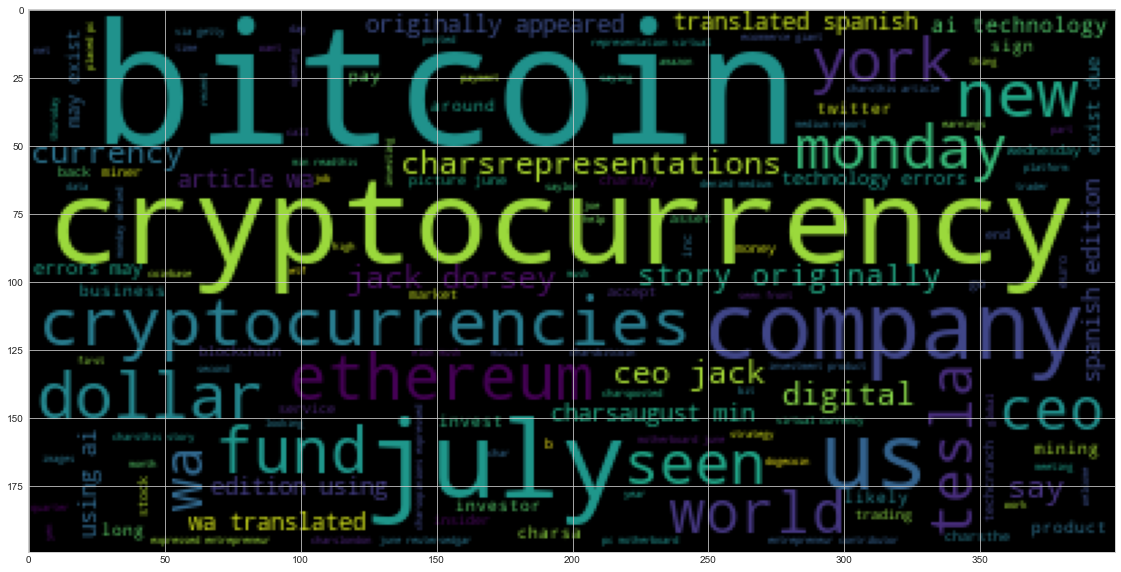

In [25]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
bitcoin_cloud = ' '.join(bitcoin_token)
wc = WordCloud().generate(bitcoin_cloud)
plt.imshow(wc)

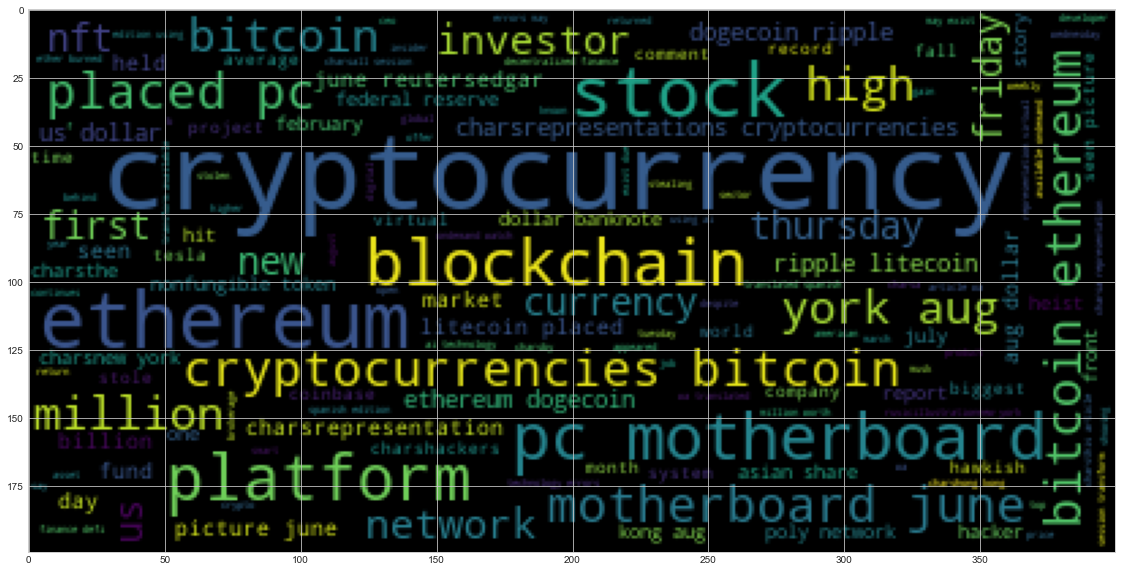

In [26]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
ethereum_cloud = ' '.join(ethereum_token)
wc = WordCloud().generate(ethereum_cloud)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

C:\Users\sujit\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sujit\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sujit\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sujit\Anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\f

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---